**Bytes**

The term byte refers to the basic unit of storage in the computer.

A byte is 8 bits, and so we can represent an integer from 

$\{ 0,1,\ldots,2^8-1=255\}$

Every file in your computer is stored as a collection of bytes. It is common to represent bytes using two hexadecimal characters (0,1,...,9,A,B,C,D,E,F). 

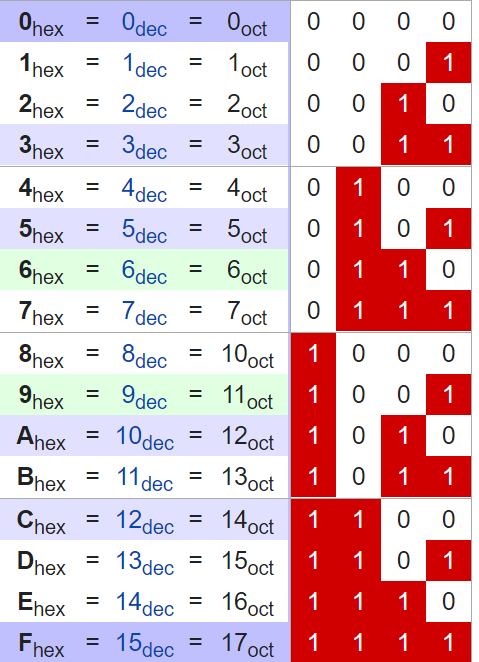

For example, consider the decimal number 211. We have (all numbers here are decimals)

$211 = 1 \times 128+1 \times 64+0 \times 32+1\times 16+0\times 8+0\times 4 + 1\times 2+1\times 1$

$211_{dec}=11010011_{bin}.$

For its hexadecimal representation, we have 

$1101_{bin} = 13_{dec} = D_{hex}$ 

$0011_{bin} = 3_{dec} = 3_{hex}$

$211_{dec} = 13_{dec} \times 16_{dec} + 3_{dec} \times 1_{dec} = D3_{hex}$

**Online converters**

There are lots of online converters. Here is one for converting decimals to hex and hex to decimal

https://www.rapidtables.com/convert/number/decimal-to-hex.html

**Specifying numbers literally**

In Python, we can create an int using a literal hexadecimal value using a **0x** prefix.

In [1]:
x=0x9ADE21
print(type(x))
print(x)

<class 'int'>
10149409


And we can create a binary int using the **0b** prefix

In [2]:
x=0b1011011
print(type(x))
print(x)

<class 'int'>
91


**Conversions in python**

In python, we can convert from literal strings to ints using the **int** function, but we need to specify a base.

In [3]:
x="0x6ADC17F"
int(x,16)

112050559

In [4]:
x="0b1011011"
int(x,2)

91

**Expressing an int as hex or binary**

We can determine the hexadecimal or binary representation of an int using the **hex** or **bin** functions.

These produce strings that correspond to how we would write the int literally in the appropriate base.

In [5]:
hex(121341)

'0x1d9fd'

In [6]:
bin(121341)

'0b11101100111111101'

**Why think in terms of bytes?**

It is possible to do lots of programming without every having to worry about bytes but really good reasons to understand byte representations:

1) Representing large quantities of data is not efficient using *text* files. What is a text file? Typically, we think of a text file as consisting of ascii characters or maybe extended ascii character, with numbers stored a characters like you type on your keyboard. 

See e.g.
https://www.asciitable.com/

So, for example, and digit would be stored using a single byte as defined in the ascii table. It takes 5 characters, hence 5 bytes, to store the decimal number 65535 this way. But $65535_{dec}=FFFF_{hex}$ so we only need 2 bytes.

2) More importantly, reading and writing text files is typically much slower than reading and writing binary files. This is one of the reasons why databases become very effective for storing and retreiving data.

3) We need a way to extend our character set beyond the ascii characters, so we're forced to use multiple bytes to encode and store additional characters.

**Bytes and byte arrays**

We need some tools for creating series of bytes. Python has two objects for doing this: 

- bytes, and 
- byte arrays

These are are like strings but they contain bytes, whereas strings are designed to contain text i.e. characters from various alphabets. 

Both are like arrays of individual bytes, and they behave similarly but a byte array is mutable. 

We can initialize an empty byte array and append a byte at a time to it. 

The argument to the append method can be a decimal from 0,1,...,255.

In [7]:
b=bytearray()
print(b)
b.append(65)
print(b)
b.append(66)
print(b)
b.append(172)
print(hex(172))
print(b)
b.append(10)
print(b)
b.append(214)
print(b)

bytearray(b'')
bytearray(b'A')
bytearray(b'AB')
0xac
bytearray(b'AB\xac')
bytearray(b'AB\xac\n')
bytearray(b'AB\xac\n\xd6')


**ASCII vs. non-ASCII bytes**

Note that when we print the byte array, it shows us an ascii character if that is printable. But there is no ascii 172, so we get the hexadecimal representation of 172 which is AC.

We can also append a literal hexadecimal byte.

In [8]:
b.append(0xad)
print(b)

bytearray(b'AB\xac\n\xd6\xad')


When we try to append a decimal greater than 255 we get an error

In [9]:
b.append(256)

ValueError: byte must be in range(0, 256)

**Creating a byte array from a list**

We can construct a byte array from a list.

In [10]:
L=[0x23,0xA2,61, 74,0b1101, 0b0111]
b=bytearray(L)
print(b)

bytearray(b'#\xa2=J\r\x07')


**Efficiency of binary vs. text files**

The following code was run to print out a sequence of 16,777,216 ascii characters to a file. 

The **chr** function converts an integer in the range 0-127 to an ascii character. When we write that character to a file, it takes a byte whose value is the integer in hexadecimal.

In [11]:
type(chr(123))

str

In [12]:
print(chr(123))

{


In [13]:
import timeit

setup="""
import numpy as np
N=256**3
L=np.random.choice(range(128),size=N)
M=[chr(j) for j in L]
st="".join(M)
"""

code="""
fout=open("rchars.txt","w")
fout.write(st)
fout.close()
"""

timeit.timeit(setup=setup,stmt=code,number=1)

0.20795510000004924

**Byte version**

Now we try writing a binary file of the same length as the one above.

Here, we need to tell python to open the file as binary for writing.

The thing we write must be some sort of bytes object.

In [14]:
import timeit

setup="""
import numpy as np
N=256*256*256
L=list(np.random.choice(range(256),size=N))
stb=bytearray(L)
"""

code="""
fout=open("rcharsb.txt","wb")
fout.write(stb)
fout.close()
"""

timeit.timeit(setup=setup,stmt=code,number=1)

0.00837679999995089

**Reading the files**

Next we compare the time to read the two files.

In [15]:
setup=""
code="""
fin=open("rchars.txt","r")
st=fin.read()
fin.close()
"""
timeit.timeit(setup=setup,stmt=code,number=1)

0.23886899999990874

In [16]:
code="""
fin=open("rcharsb.txt","rb")
st=fin.read()
fin.close()
"""
timeit.timeit(setup=setup,stmt=code,number=1)

0.024707500000090477

**Setup some binary files**

Let's write the same byte array to a few files. We'll use these files below.

In [17]:
b=b'Special character: \xf0\x9f\x98\xb8\r\nSpecial character: \xf0\x9f\x98\x80\r\nSpecial character: \xce\xa8'
with open("special.txt","wb") as fout:
    fout.write(b)
with open("special2.txt","wb") as fout:
    fout.write(b)
with open("special3.txt","wb") as fout:
    fout.write(b)


**Reading bytes**

We can move to a file pointer to a (byte) position in a file and read some number of bytes starting from there.

In [18]:
fin=open("special.txt","rb")

fin.seek(10)
b=fin.read(1)
print(b)
print(type(b))

fin.seek(4)
b=fin.read(3)
print(b)
print(type(b))

fin.seek(21)
b=fin.read(5)
print(b)

fin.close()

b'a'
<class 'bytes'>
b'ial'
<class 'bytes'>
b'\x98\xb8\r\nS'


**Replacing a byte**

We can also replace a byte in a file in some position. 

In the following, the mode of "r+b" refers to opening for reading from **and** writing to a binary file.

(The "r+" option was not mentioned in the notebook about reading and writing text files, but it is available for textfiles as well.)

In [19]:
f=open("special3.txt","r+b")
f.seek(2)
f.write(b'\x61')
f.close()

In [20]:
fin=open("special3.txt","rb")
b=fin.read()
fin.close()
print(b)

b'Spacial character: \xf0\x9f\x98\xb8\r\nSpecial character: \xf0\x9f\x98\x80\r\nSpecial character: \xce\xa8'


In [21]:
fin=open("special2.txt","r+b")
b=fin.read()
print(b)

fin.seek(2)
b=fin.write(b'\x61\x62\x81\x82')

fin.seek(0)
b=fin.read()
print(b)

fin.close()

b'Special character: \xf0\x9f\x98\xb8\r\nSpecial character: \xf0\x9f\x98\x80\r\nSpecial character: \xce\xa8'
b'Spab\x81\x82l character: \xf0\x9f\x98\xb8\r\nSpecial character: \xf0\x9f\x98\x80\r\nSpecial character: \xce\xa8'


**Can't write bytes w/o the b**

What happens if we try to write a bytes object to a file without the b flag?

In [22]:
b=b'\x72\x75'
fin=open("try.txt","w")
fin.write(b)
fin.close()

TypeError: write() argument must be str, not bytes

**Can't necessarily read non-ASCII as text**

In [23]:
fin=open("special2.txt","r")
text=fin.read()
fin.close()
print(text)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 4: character maps to <undefined>

**Unicode is next!!!**